---
title: "First ML Model"
---

### Commmon Functions

**Top Note**

Loss Function, Optimizerm, Arch 

In [131]:
import keras
def plot_history(self):
    loss=self.history['loss']
    acc=self.history['accuracy']
    val_loss=self.history['val_loss']
    val_acc=self.history['val_accuracy']

    epochs=range(len(loss))

    _, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
    ax1.plot(epochs, loss,'k.',label='Training Loss')
    ax1.plot(epochs, val_loss,'k-', label='Validation Loss')
    ax1.set_title('Loss Function')

    ax2.plot(epochs,acc, 'k.')
    ax2.plot(epochs,val_acc,'k-')
    ax2.set_title('Accuracy')
keras.src.callbacks.History.plot=plot_history

### IBM Data Schema (Or Possible for any NLP data set-up)
First thing to know the the word will load top 10,000 (you choice) frequency of worlds 
and index them by they Global Frequencys;

Second thing to notice is index 0,1,2 (in fact freqency) are reserved for "paddings","start of sequenhce", "unknown"

In [133]:
from keras.datasets import imdb
MAXWORD_FREQ=10000
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=MAXWORD_FREQ)
word_index = imdb.get_word_index()

### Recreate sentences from word numeric index
The `word_index` is keyvalue pair, 'world':'frequency'. 
You recreate it by map it back to the sequence of int representing words. 
With off set word_index 1, to 3, because they are reserved for paddings.


In [134]:
word_index = imdb.get_word_index()                                    #1
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])            #2
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])      #3
	
#1 - word_index is a dictionary mapping words to an integer index.
#2 - Reverses it, mapping integer indices to words
#3 - Decodes the review. 
## Note that the indices are offset by 3 because 0, 1, and 2 
## are reserved indices for “padding,” “start of sequence,” and “unknown.”	

def decode_review(vec):
    if(len(vec)==1):
        return reverse_word_index.get(i - 3, '?')
    decoded_review = ' '.join(
        [reverse_word_index.get(i - 3, '?') for i in vec])
    return decoded_review

## tip of the day: textwrap
import textwrap 
print(textwrap.fill(decoded_review, 75))
print(train_labels[0])
print('\nNotice that some below index are reserved for ...')
print([reverse_word_index.get(i) for i in range(3)])

? this film was just brilliant casting location scenery story direction
everyone's really suited the part they played and you could just imagine
being there robert ? is an amazing actor and now the same being director ?
father came from the same scottish island as myself so i loved the fact
there was a real connection with this film the witty remarks throughout the
film were great it was just brilliant so much that i bought the film as
soon as it was released for ? and would recommend it to everyone to watch
and the fly fishing was amazing really cried at the end it was so sad and
you know what they say if you cry at a film it must have been good and this
definitely was also ? to the two little boy's that played the ? of norman
and paul they were just brilliant children are often left out of the ? list
i think because the stars that play them all grown up are such a big
profile for the whole film but these children are amazing and should be
praised for what they have done don't you thi

In [135]:
[reverse_word_index.get(i) for i in [0,1,2,3]]
print(f'%s of disequal list of array;'%train_data.shape[0])
print('To input as a tensor you expect a matrix to be equal')

25000 of disequal list of array;
To input as a tensor you expect a matrix to be equal


### Process emnumerated word index into a Tensor.

In [136]:
import numpy as np

assert max([max(vec) for vec in train_data ]) == MAXWORD_FREQ -1

def vectorize_sequences(sequences, dimension=MAXWORD_FREQ):
    results = np.zeros((len(sequences), dimension))        #1
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.                          #2
    return results

x_train = vectorize_sequences(train_data)                  #3
x_test = vectorize_sequences(test_data)                    #4

#1 - Creates an all-zero matrix of shape (len(sequences), dimension)
#2 - Sets specific indices of results[i] to 1s
#3 - Vectorized training data
#4 - Vectorized test data

## As I unerstand it this particular matrix simply capture accurances.
## The number simple present if the word exists or not.

# The above step convert it to float
# Convertion Of Y Labeles
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [137]:
## Explain NP array's modification with below code:

# empty_container=np.zeros((len(train_data), 10000))
m=np.repeat(0,16).reshape((4,4))#this is also superseeded with np.zeros( (imax,jmax) )
m[0,[1,2,2,3]]=1
print(m)
print('Although 2 appear twice, it is only modified once')
print('Even if I do this instead `+=`')
m=np.zeros((4,4))
m[0,[1,2,2,3]]+=1
print(m)
print('(side effect np.zeros creates float by default)')

[[0 1 1 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
Although 2 appear twice, it is only modified once
Even if I do this instead `+=`
[[0. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
(side effect np.zeros creates float by default)


### Build a Network 

**The Hidden Unit**
Use 'Dense Layer' with 'Relu activation' is actual a linear model. Somewhat polynomial nature. 16 is the second dimension of matrix (Meaning shrink the original 10,000 into 16 dimensions). Extracting exactly 16 representation of the data. 

**The Key achitecture Decisions**
- How many layers to use;
- How many hidden uits to choose for each layer


#### Particular In This Case

**Stack two dense layers** of relu activation **won't extend the hypothesis space**. Because deep stack of linear layers would still implement a linear operation (demonstrated in [Visualise Matrix Dot Transformation](01-12.ipynb)).


In [138]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Alternative Loss and Optimizer---------------------------------------
# from keras import optimizers

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])
# from keras import losses
# from keras import metrics

# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

In [139]:
## Further Slice Traning Data to 10,000 set aside.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.5062 - acc: 0.7952 - val_loss: 0.3902 - val_acc: 0.8693
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3090 - acc: 0.9045 - val_loss: 0.3078 - val_acc: 0.8880
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 0.2295 - acc: 0.9279 - val_loss: 0.2812 - val_acc: 0.8909
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1800 - acc: 0.9439 - val_loss: 0.2752 - val_acc: 0.8909
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1467 - acc: 0.9536 - val_loss: 0.2772 - val_acc: 0.8901
Epoch 6/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1216 - acc: 0.9637 - val_loss: 0.2887 - val_acc: 0.8875
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.1019 - acc: 0.9707 - val_loss: 0.3043 - val_acc: 0.8860
Epoch 8/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0846 - acc: 0.9

Text(0.5, 0.0001, 'This model tell you to stop at 4th epoch to avoid overfitting')

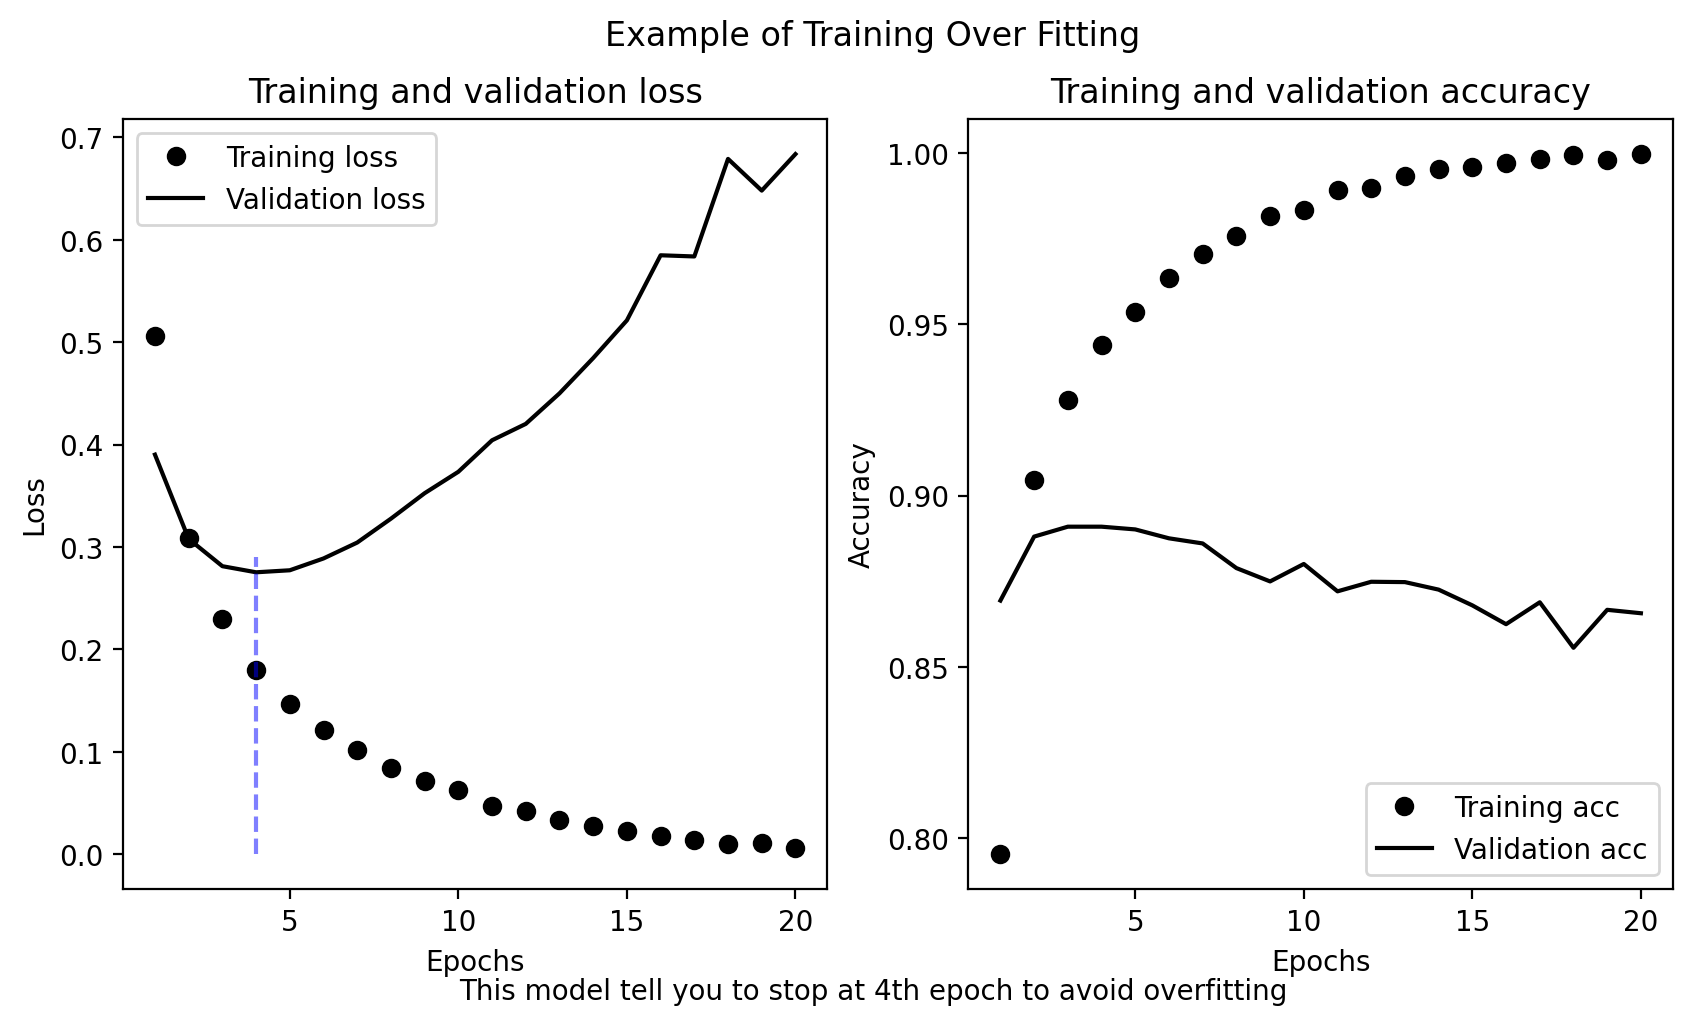

In [140]:
# history_dict = history.history
# history_dict.keys()
# # [u'acc', u'loss', u'val_acc', u'val_loss']
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc_values = history_dict['val_acc']


epochs = range(1, len(acc) + 1)

figure, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

ax1.plot(epochs, loss_values, 'ko', label='Training loss')           #1
ax1.plot(epochs, val_loss_values, 'k', label='Validation loss')      #2
ax1.vlines(4,0,0.29,colors='b',alpha=0.5,linestyles='--')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

ax2.plot(epochs, acc, 'ko', label='Training acc')
ax2.plot(epochs, val_acc_values, 'k', label='Validation acc')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

# plt.clf()                                      #1
# plt.show()

# #1 - Clears the figure
figure.suptitle('Example of Training Over Fitting')
txt='This model tell you to stop at 4th epoch to avoid overfitting'
figure.text(0.5,0.0001,txt,wrap=True,horizontalalignment='center')

In [30]:
model.evaluate(x_test,y_test)

782/782 [==============================] - 0s 462us/step - loss: 0.7591 - acc: 0.8497


[0.759108304977417, 0.8497200012207031]

This code is interesting. Resuffle the array and test collision.

In [31]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.49952

##### Retrain Network with only 4 Epoch

In [32]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512,
          validation_data=(x_val, y_val)
          )
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.4665 - accuracy: 0.8178 - val_loss: 0.3009 - val_accuracy: 0.9085
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2664 - accuracy: 0.9077 - val_loss: 0.1999 - val_accuracy: 0.9405
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2065 - accuracy: 0.9265 - val_loss: 0.1598 - val_accuracy: 0.9519
Epoch 4/4
782/782 [==============================] - 0s 463us/step - loss: 0.3000 - accuracy: 0.8806
[0.3000180721282959, 0.8805999755859375]


In [37]:
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.50368

#### Below I am Trying to Make Sense of What Happened:

Text(0.5, 1.0, 'What you put in into Tensor')

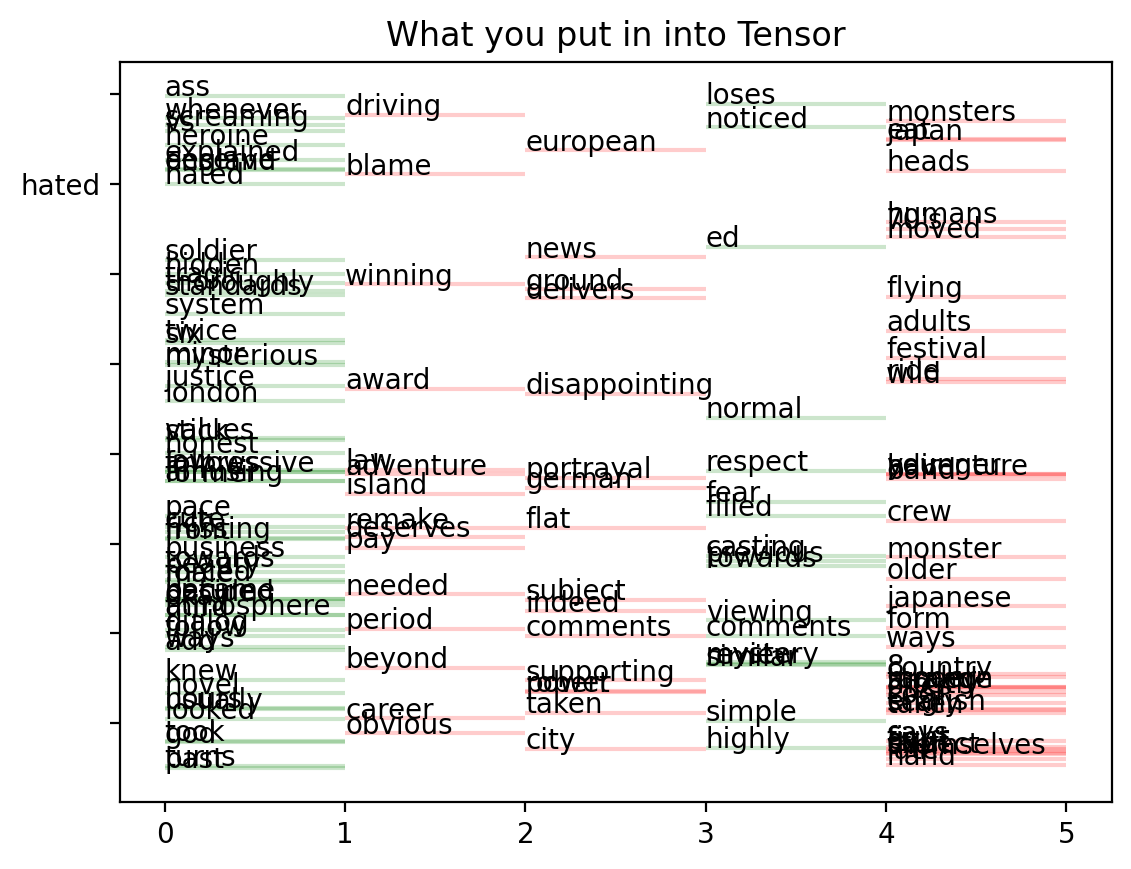

In [364]:
import matplotlib.ticker as mticker
n=0
rel_word_i={}
MIN_FREQ=500
MAX_FREQ=2000
random_sample=np.random.randint(0,len(x_train),5)
def update_y_tick(x,pos):
    if x in rel_word_i.keys():
        return rel_word_i[x]
    else:
        return ""
for i, vec in enumerate(x_train[random_sample]):# select first 4 corpus
    word_i = [i for i,value in enumerate(vec) if value==1.0 and i <= MAX_FREQ and i >= MIN_FREQ]
    if(y_train[i]==1.0):
        col='g'
    else:
        col='r'
    plt.hlines(word_i, xmin=n,xmax=n+1,colors=col,alpha=0.2)
    for wi in word_i:
        rel_word_i[wi]=reverse_word_index[wi-3]
        plt.text(y=wi,x=n,s=reverse_word_index[wi-3])
    n+=1
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(update_y_tick))
plt.title('What you put in into Tensor')
# plt.vlines(np.arange(len(x_train[0])),x_train[0])
# plt.vlines(np.arange(len(x_train[1])),x_train[1])

In [369]:
from colorama import Fore
from textwrap import fill,shorten

for i,w in enumerate(train_data[random_sample]):
    senti = train_labels[random_sample][i]
    if senti == 1.0:
        Obj=Fore.GREEN
    else:
        Obj=Fore.RED
    print(Obj + fill(shorten(decode_review(w),200),80))
    print('\n')

? i can't say how closely the film follows the novel never having read the book
but since this ? in at some six and a half hours it's a good bet that most of
the base are covered or at least we [...]


? i do not believe all the praise for this movie the play and movie were a
ripoff of sleuth michael caine wishes he were olivier and reeves wishes he were
caine caine even had the nerve to do a [...]


? this is a tepid ? drama that covers no new ground ? all the cliches and is
sloppy with facts for example ? is a very flat city so why is it ? in the movie
for example the end of the great war [...]


? i read some previous comments stating that this movie loses steam towards the
end of the movie and also that it has a similar ending to cape fear i completely
disagree i'm going to give a [...]


? yokai ? is a children's film by takashi miike but as you might expect it's
probably a bit too dark scary for younger ones however older children may well
eat this up that is if you play it [...]

I had attempt to visualise the weight matrix and see roughly see what it has been doing underlaying...it is not straight forward at all...

But it seems this by itself could be a project on its own. 

In [366]:
# from functools import reduce
[print('Weight',i+1,w.shape) for i,w in enumerate(model.weights)]
# dimension reduction layer
drW=model.weights[0]

Weight 1 (10000, 16)
Weight 2 (16,)
Weight 3 (16, 16)
Weight 4 (16,)
Weight 5 (16, 1)
Weight 6 (1,)


The first weight is probably reduce dimension of 100000 words into 16 distinct dimensions; Its probably best to compare which index of each dimension is unique

0 : ask ... boat ... karloff ... pig
1 : running ... understanding ... letting ... lately
2 : cannot ... plane ... wears ... idiots
3 : personal ... uk ... knock ... pig
4 : hair ... v ... suspects ... winds
5 : problems ... fate ... fired ... persons
6 : indeed ... wind ... quote ... decisions
7 : ask ... alice ... pants ... offs
8 : female ... v ... appearances ... outfit
9 : male ... fool ... walken ... operation
10 : female ... committed ... shirt ... mars
11 : male ... fate ... racism ... ginger
12 : indeed ... environment ... satan ... pressure
13 : female ... wind ... cook ... explaining
14 : female ... idiots ... justin ... 1991
15 : male ... multiple ... we'll ... operation
Analysis this way is bit waste of time again you are in reading tea leaf


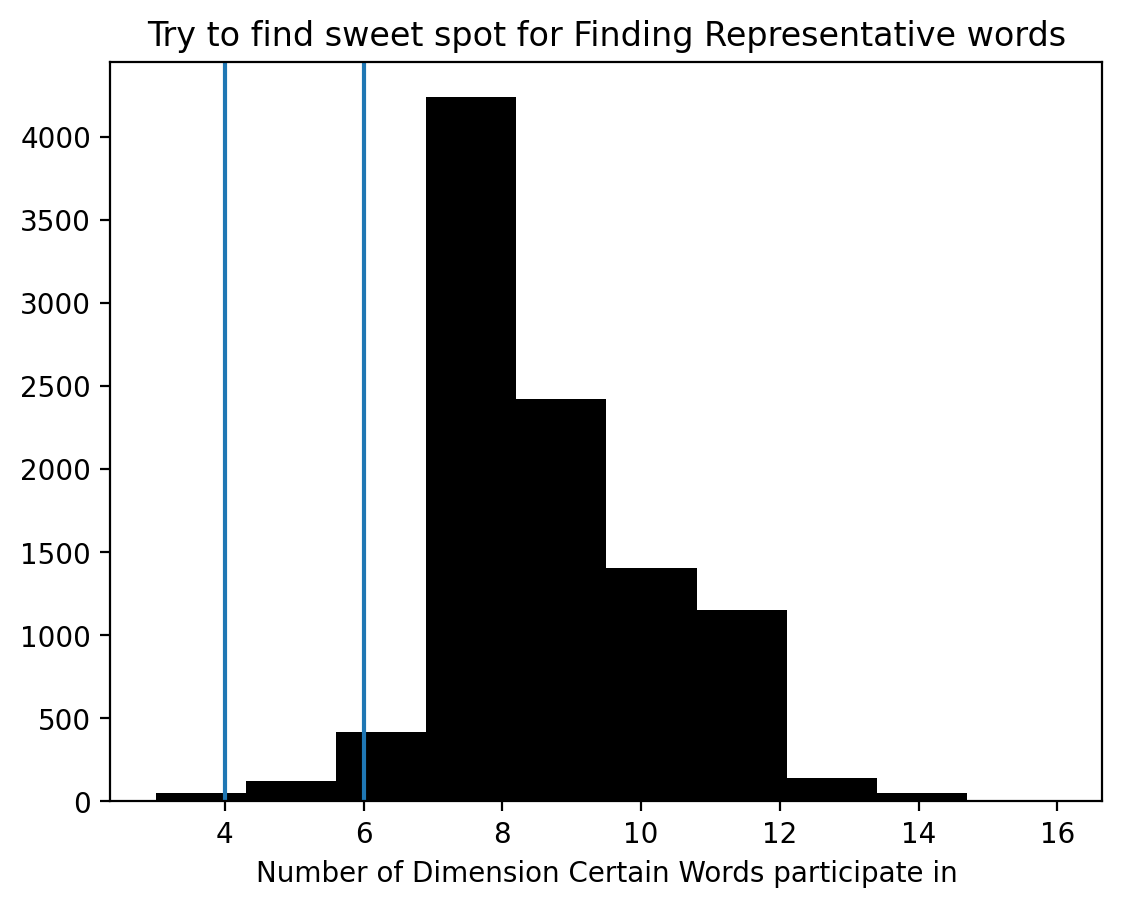

In [368]:
## The Following Code Try to 
# assert np.all(np.where(drW < 0, 0, 1)[0:1,]==np.where(drW < 0, 0, 1)[0,:])
# # its not easy because you have to remember the
# ## off set 3 rule
# ## and top frequency words are amost meanless
# rs={}
# for dim,line in enumerate(np.where(drW < 0, 0, 1)[0:2000,].T):
#     keywords = [reverse_word_index.get(i-3, '?') for i,e in enumerate(line) if e == 1][1000:]
#     rs[f'dimension %s'%(dim+1)]=keywords

# for d,w in rs.items():
#     print(d)
#     print(', '.join(w[0:3]),'...')

dimention_reduction_weight = model.weights[0]
DrW=np.where(dimention_reduction_weight <=0, 0, 1)


plt.hist(DrW.sum(axis=1),color='k')
plt.title("Try to find sweet spot for Finding Representative words")
plt.xlabel("Number of Dimension Certain Words participate in")

FLOOR_COM=4
CEILING_COM=6

plt.axvline(FLOOR_COM,0,4000)
plt.axvline(CEILING_COM,0,4000)

## Try Decode Feature Appears 
distinctive=(DrW.sum(axis=1) <= CEILING_COM) & (DrW.sum(axis=1) >= FLOOR_COM)
distinctive_index = np.arange(10000)[distinctive]
distinctive_word = [reverse_word_index.get(i-3,'?') for i in distinctive_index]#these words are distinctive
distinctive_weight=DrW[distinctive,:]
representitive_word={}

for d,lines in enumerate(distinctive_weight.T):
    words=[]
    for w,value in enumerate(lines):
        if value==1:
            words.append(distinctive_word[w])
        else:
            pass
    representitive_word[d]=words

for i,w in representitive_word.items():
    offset=3
    print(i,":", ' ... '.join(w[0+offset:80+offset:20]))
print("Analysis this way is bit waste of time again you are in reading tea leaf")

#### Suggestion For Further Experiment
- Use three layers
- Use more units
- Try use `mse` loss function 
- Try use `tanh` activation.

In [142]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=512,
                    validation_data=(x_val, y_val)
                    )

Epoch 1/20
49/49 [==============================] - 1s 17ms/step - loss: 0.5320 - accuracy: 0.7627 - val_loss: 0.3314 - val_accuracy: 0.8636
Epoch 2/20
49/49 [==============================] - 0s 6ms/step - loss: 0.2966 - accuracy: 0.9025 - val_loss: 0.2181 - val_accuracy: 0.9338
Epoch 3/20
49/49 [==============================] - 0s 5ms/step - loss: 0.2361 - accuracy: 0.9278 - val_loss: 0.1827 - val_accuracy: 0.9556
Epoch 4/20
49/49 [==============================] - 0s 5ms/step - loss: 0.1971 - accuracy: 0.9416 - val_loss: 0.1518 - val_accuracy: 0.9605
Epoch 5/20
49/49 [==============================] - 0s 5ms/step - loss: 0.1731 - accuracy: 0.9547 - val_loss: 0.1504 - val_accuracy: 0.9684
Epoch 6/20
49/49 [==============================] - 0s 5ms/step - loss: 0.1460 - accuracy: 0.9636 - val_loss: 0.1169 - val_accuracy: 0.9781
Epoch 7/20
49/49 [==============================] - 0s 5ms/step - loss: 0.1272 - accuracy: 0.9714 - val_loss: 0.1012 - val_accuracy: 0.9834
Epoch 8/20
49/49 [=

782/782 [==============================] - 0s 455us/step - loss: 1.3543 - accuracy: 0.8439
[1.3543484210968018, 0.8439199924468994]


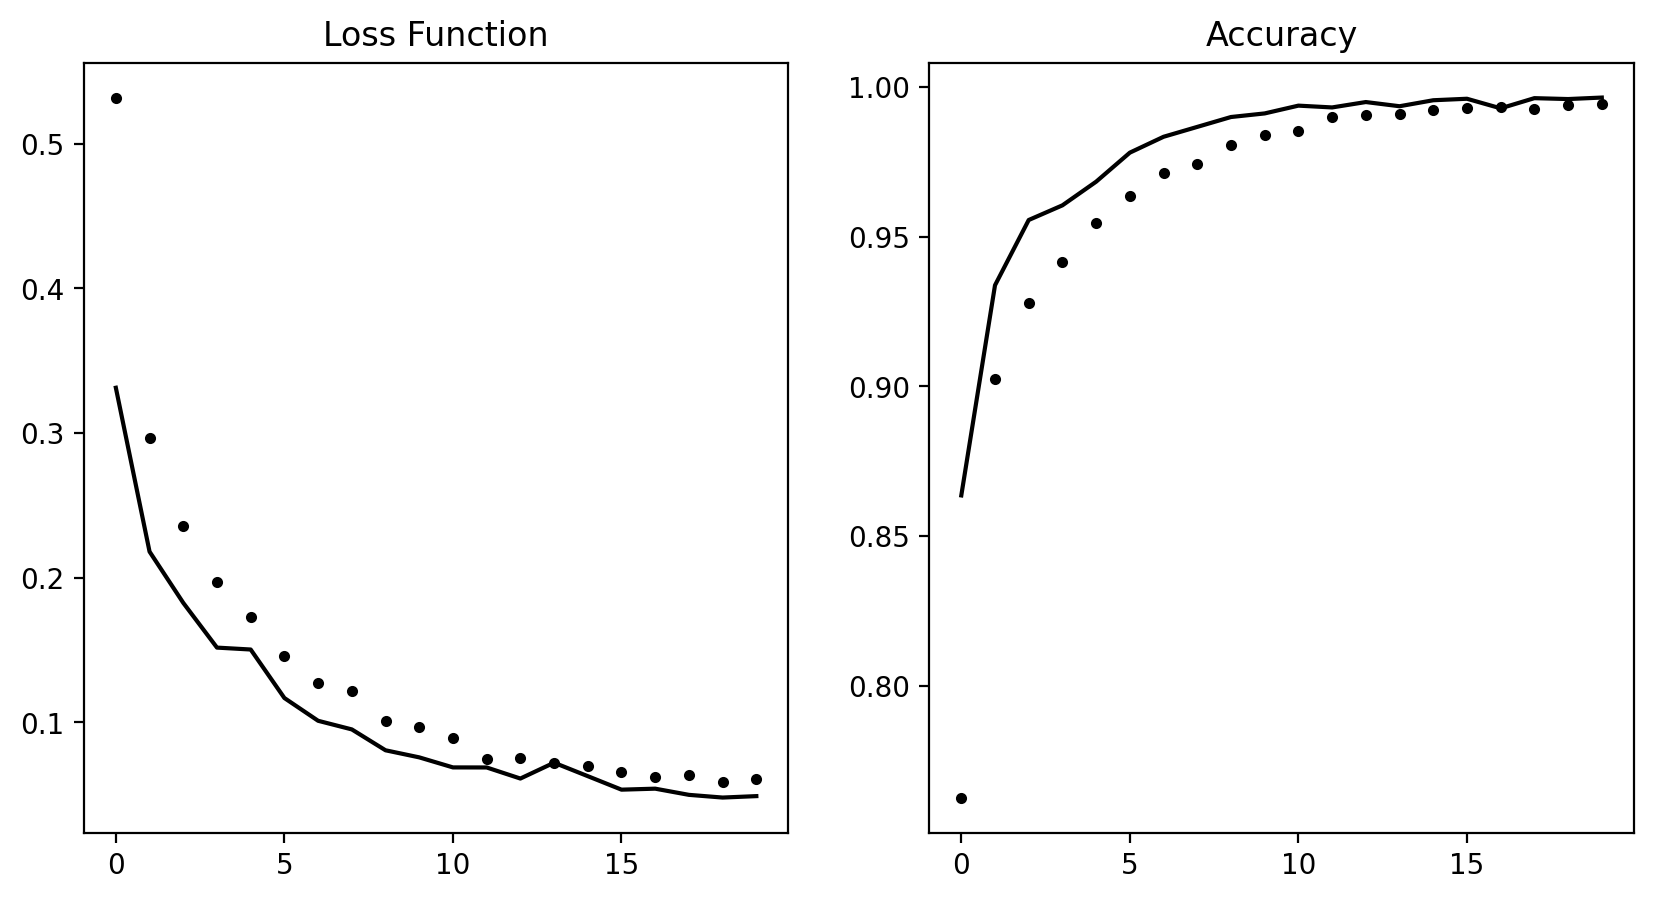

In [143]:
history.plot()
results = model.evaluate(x_test, y_test)
print(results)

## Reuters Classification

here are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

In [144]:
# class utilities
# you thought they'd have a plot method by now
import keras
def plot_history(self):
    loss=self.history['loss']
    acc=self.history['accuracy']
    val_loss=self.history['val_loss']
    val_acc=self.history['val_accuracy']

    epochs=range(len(loss))

    _, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
    ax1.plot(epochs, loss,'k.')
    ax1.plot(epochs, val_loss,'k-')
    ax1.set_title('Loss Function')

    ax2.plot(epochs,acc, 'k.')
    ax2.plot(epochs,val_acc,'k-')
    ax2.set_title('Accuracy')
keras.src.callbacks.History.plot=plot_history


def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [145]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [146]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])                                                          #1
decoded_newswire
#1 - Note that the indices are offset by 3 because 0, 1, and 2 are reserved indices for “padding,” “start of sequence,” and “unknown.”
         

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [147]:
import numpy as np



x_train = vectorize_sequences(train_data)            #1
x_test = vectorize_sequences(test_data)              #2

#1 - Vectorized training data
#2 - Vectorized test data
         

In [148]:
one_hot_train_labels = to_one_hot(train_labels)        #1
one_hot_test_labels = to_one_hot(test_labels)          #2

#1 - Vectorized training labels
#2 - Vectorized test labels

In [149]:

for para in train_data[:3]:
    words=[reverse_word_index.get(i-3,'?') for i in range(len(para))]
    sentence=' '.join(words)
    print(textwrap.fill(sentence,70))

? ? ? ? the of to in said and a mln 3 for vs dlrs it reuter 000 1 pct
on from is that its cts by at year be with 2 will was billion he u s
net has would an as 5 not loss 4 1986 company which but this shr last
are lt have or 6 bank 7 were 8 had oil trade share one about 0 inc 9
new profit also market they two shares stock corp tonnes 10 up been
revs
? ? ? ? the of to in said and a mln 3 for vs dlrs it reuter 000 1 pct
on from is that its cts by at year be with 2 will was billion he u s
net has would an as 5 not loss 4 1986 company which but this shr last
are
? ? ? ? the of to in said and a mln 3 for vs dlrs it reuter 000 1 pct
on from is that its cts by at year be with 2 will was billion he u s
net has would an as 5 not loss 4 1986 company which but this shr last
are lt have or 6 bank 7 were 8 had oil trade share one about 0 inc 9
new profit also market they two shares stock corp tonnes 10 up been
revs prices sales 1987 per may after april march more price than
quarter first other rate 

In [159]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# this coponent can be rerun often
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Text(0.5, 0.98, 'A rmsporp optimiser on categorical_crossentropy')

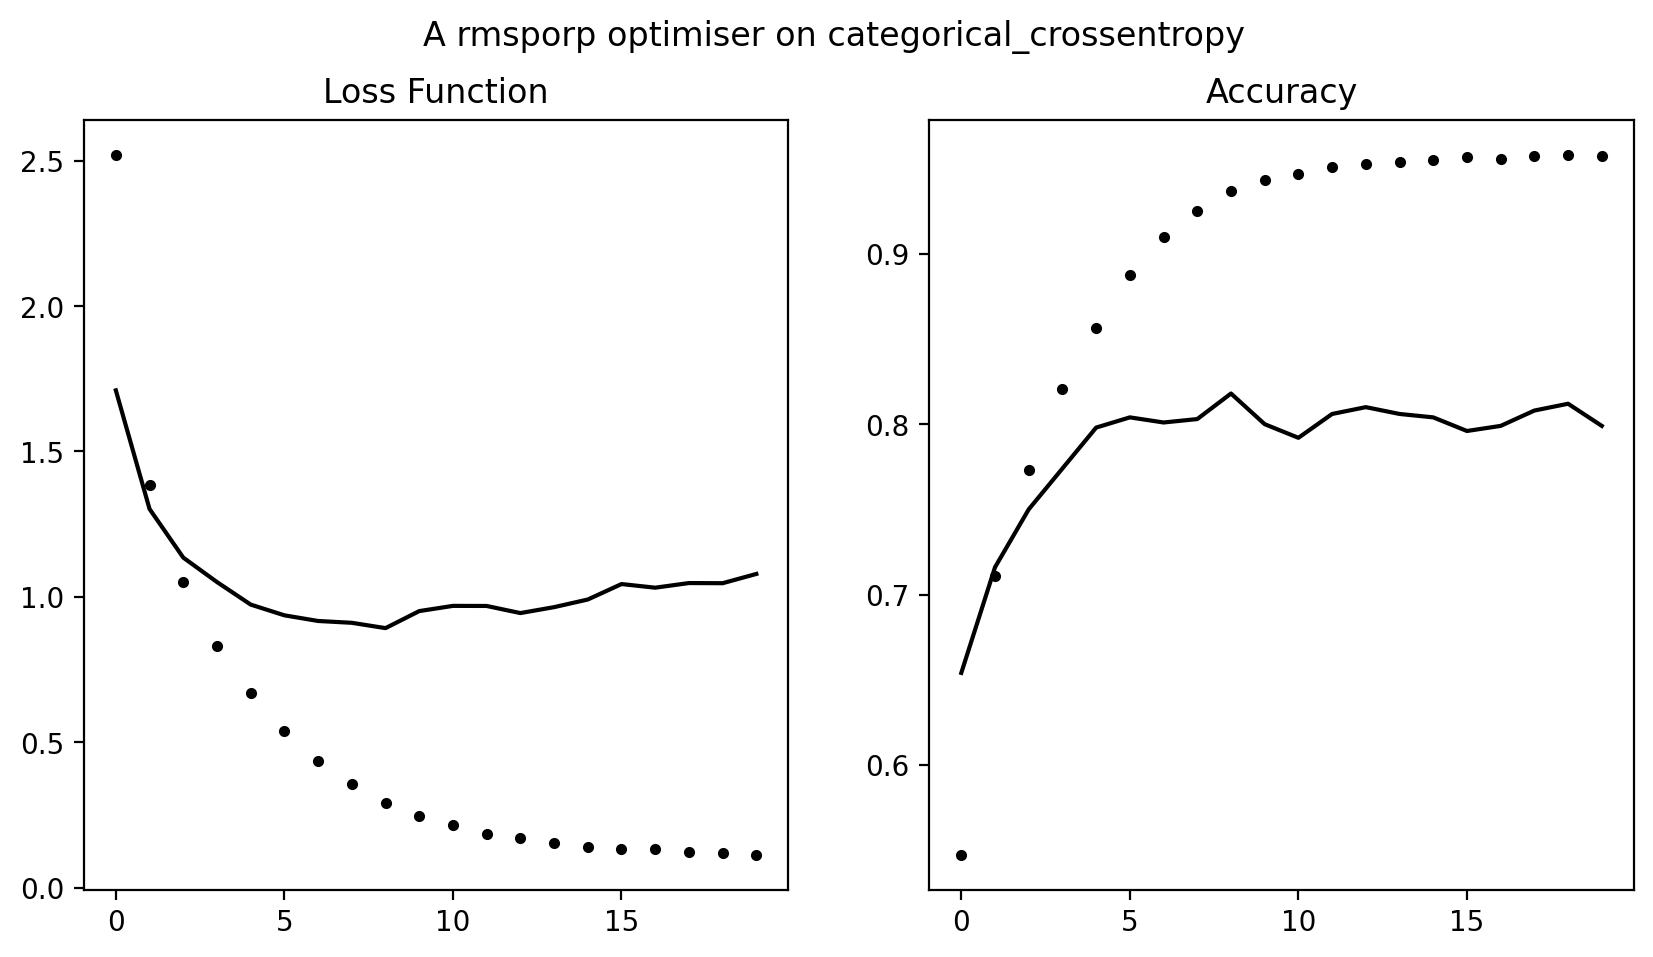

In [162]:
history.plot()
plt.gcf().suptitle('A rmsporp optimiser on categorical_crossentropy')

## The Boston Housing Price

In [166]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 1us/step


In [167]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [168]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()                                  #1
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

#1 - Because you’ll need to instantiate the same model multiple times, you use a function to construct it.	
         

In [169]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]    #1
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate(                                     #2
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()                                                    #3
    model.fit(partial_train_data, partial_train_targets,                     #4
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)      #5
    all_scores.append(val_mae)

#1 - Prepares the validation data: data from partition #k
#2 - Prepares the training data: data from all other partitions
#3 - Builds the Keras model (already compiled)
#4 - Trains the model (in silent mode, verbose = 0)
#5 - Evaluates the model on the validation data
         

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [172]:
all_scores
np.mean(all_scores)

2.540156304836273